In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("data/sqisland.csv")
data.head()

,X,Y,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7
0,0,0,1.0000,0.0000,0.200,0.800,0.522037,0.159444,0.318519
1,1,0,0.7937,0.2063,0.196,0.804,0.392723,0.261580,0.345697
2,2,0,0.8064,0.1936,0.198,0.802,0.378992,0.276521,0.344487
3,3,0,0.8133,0.1867,0.200,0.800,0.518388,0.148887,0.332725
4,4,0,0.7575,0.2425,0.182,0.818,0.244396,0.286995,0.468610


## Q1

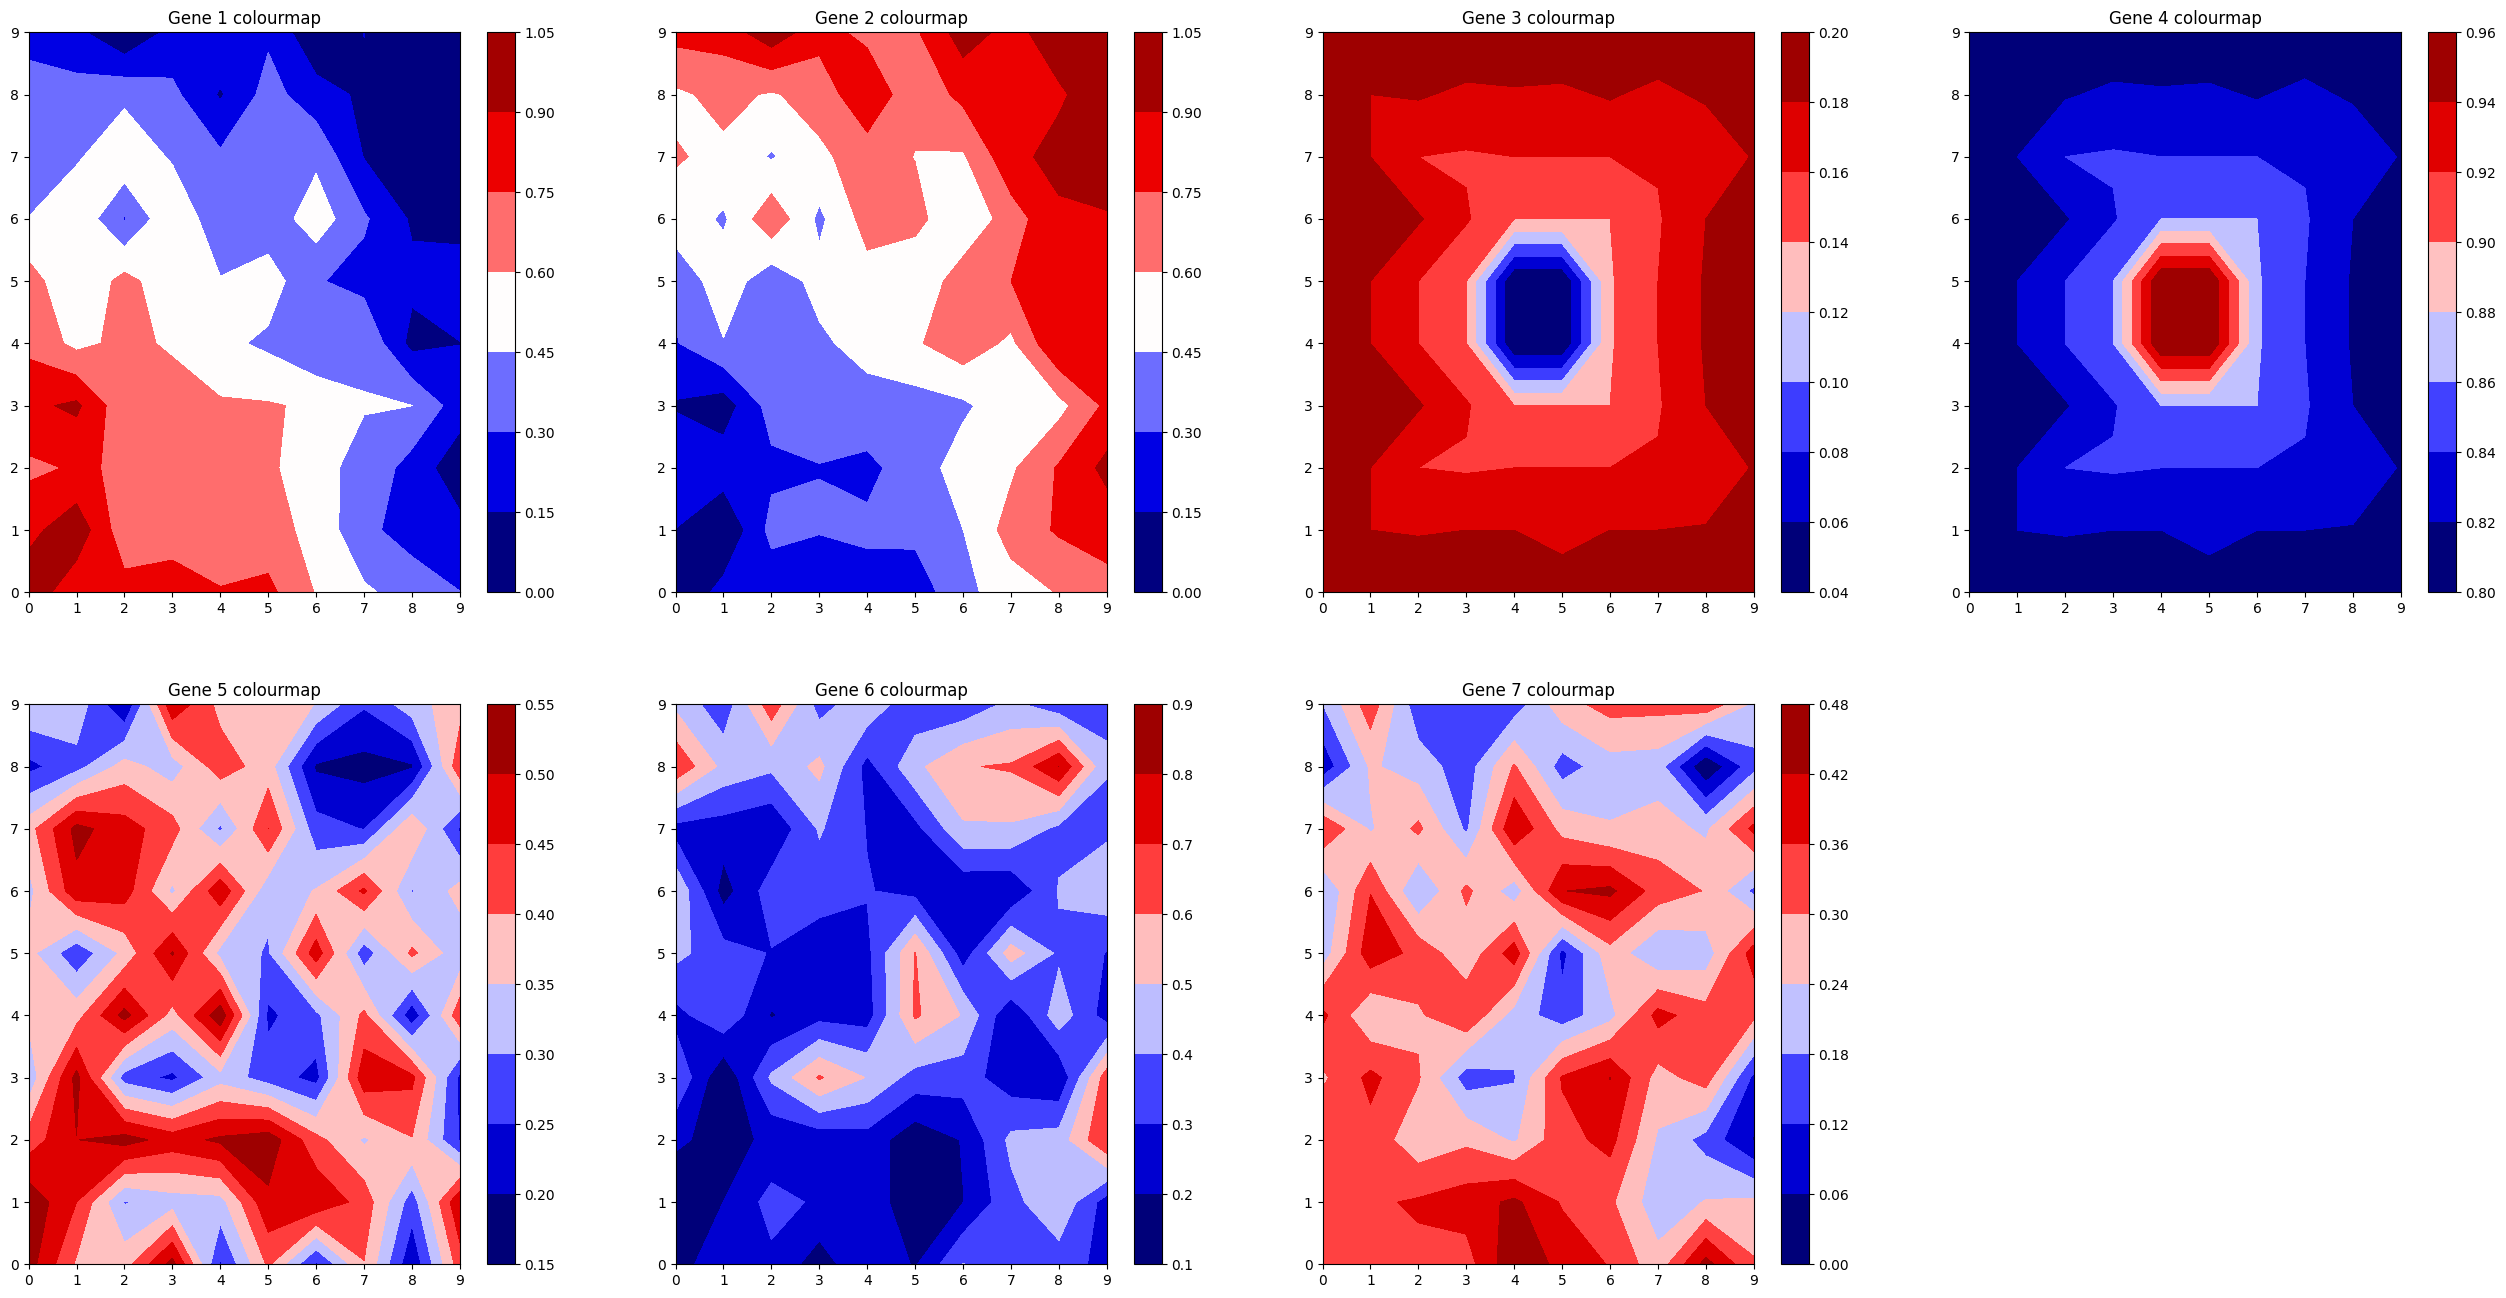

In [62]:
fig, ax = plt.subplots(2, 4, figsize=(32, 16))
ax[1][3].remove()
for i in range(7):
    axis = ax[0 if i < 4 else 1][i % 4]
    axis.set_title(f"Gene {i + 1} colourmap")
    plt.colorbar(
        axis.contourf(data[f"Gene{i + 1}"].to_numpy().reshape((10, 10)), cmap="seismic")
    )

## Q2

## Q3

## Q4

In [86]:
genes = data.drop(["X", "Y"], axis=1)
genes.var(axis=0)

Gene1    0.061194
Gene2    0.061194
Gene3    0.001095
Gene4    0.001095
Gene5    0.009610
Gene6    0.020981
Gene7    0.009166
dtype: float64

## Q5

In [88]:
print(
    f"Correlation between genes 1 and 4: {data['Gene1'].corr(data['Gene4'], method='pearson')}"
)
print(
    f"Correlation between genes 1 and 5: {data['Gene1'].corr(data['Gene5'], method='pearson')}"
)

Correlation between genes 1 and 4: 0.07526456660171588
Correlation between genes 1 and 5: 0.36012032407985833


## Q6

In [115]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
pca.fit(data.drop(["X", "Y"], axis=1))
new_data = pd.DataFrame(pca.fit_transform(data.drop(["X", "Y"], axis=1)))
new_data.rename(
    columns=dict(enumerate(f"Principal component {index}" for index in range(8))),
    inplace=True,
)
new_data.var(axis=0)

Principal component 0    1.322461e-01
Principal component 1    2.168072e-02
Principal component 2    8.267649e-03
Principal component 3    2.141399e-03
Principal component 4    6.535767e-20
Principal component 5    1.054879e-33
Principal component 6    1.886793e-33
dtype: float64

## Q7

In [122]:
pre_pca_var = data.drop(["X", "Y"], axis=1).var(axis=0)
post_pca_var = new_data.var(axis=0)
print(sum(pre_pca_var), sum(post_pca_var))
np.isclose(sum(pre_pca_var), sum(post_pca_var))

0.16433592209080264 0.1643359220908028


True

This result is to be expected, the values are not quite equal due to floating point arithmetics

## Q8

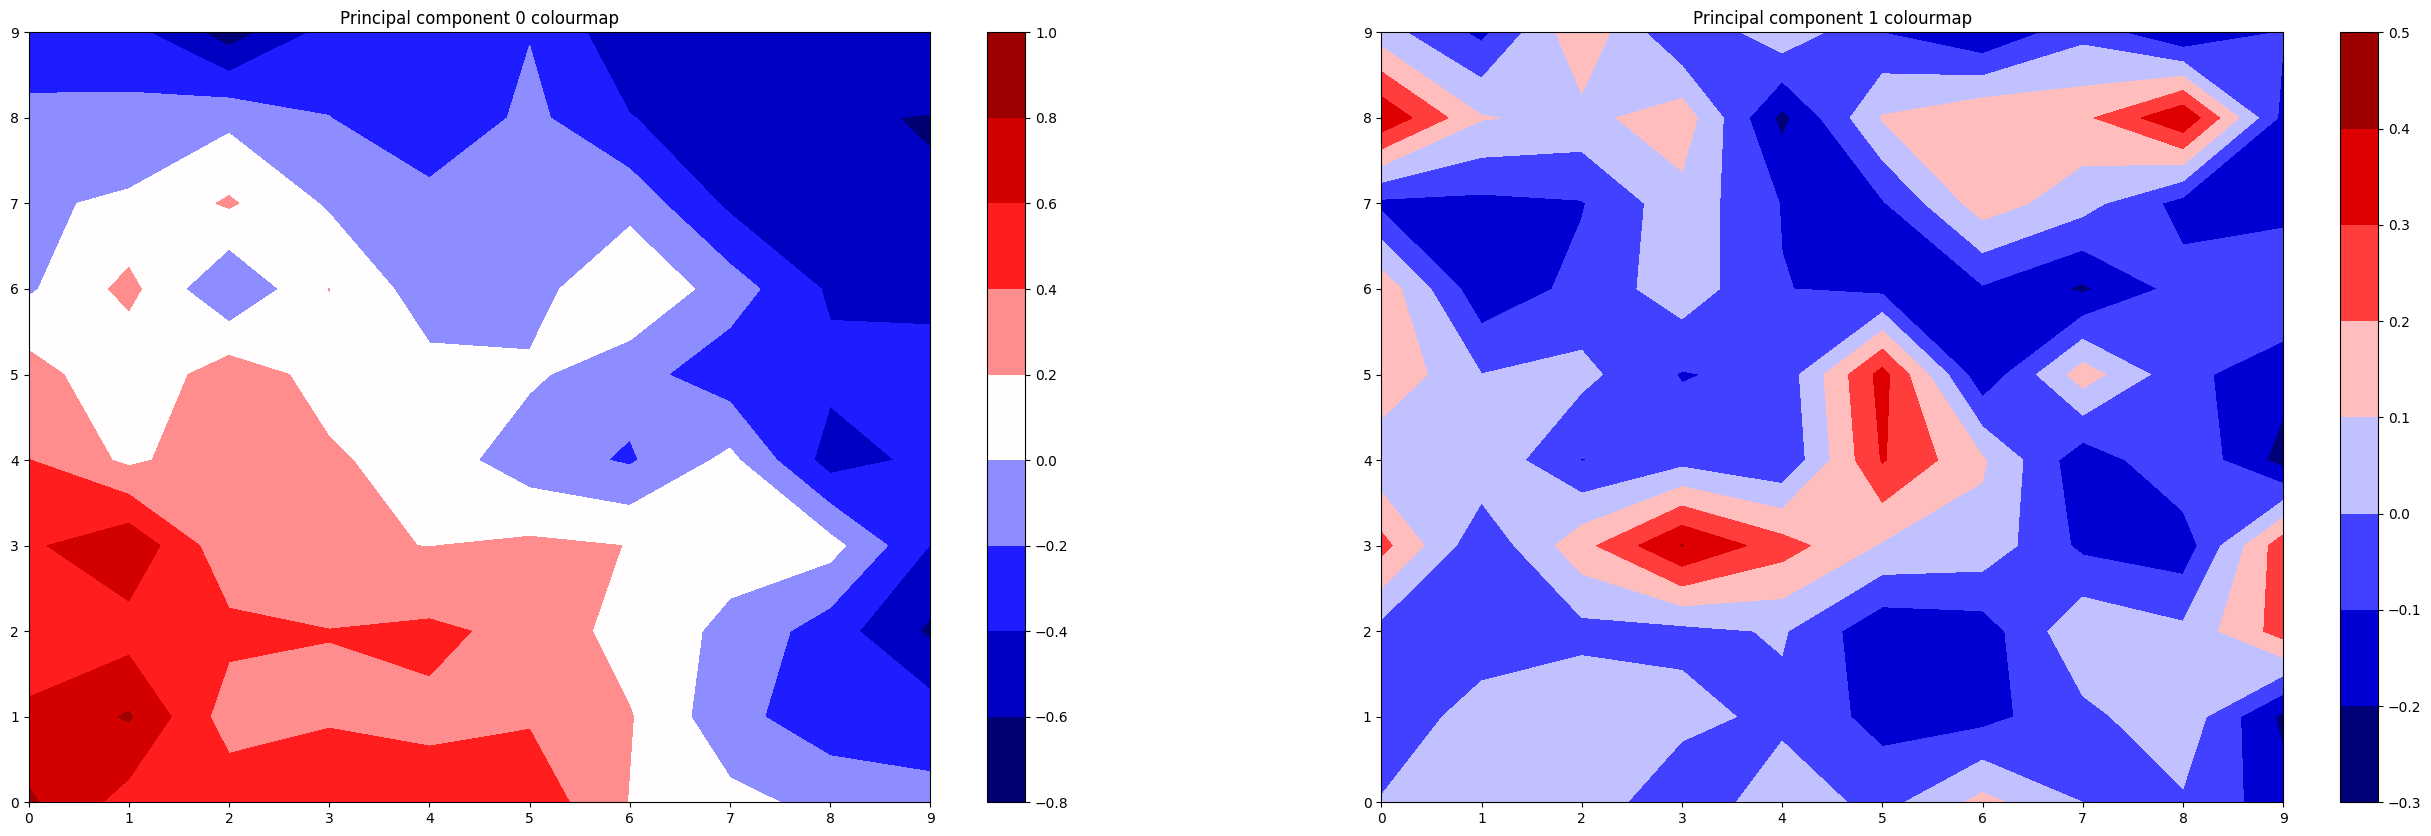

In [123]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(32, 10))
ax1.set_title("Principal component 0 colourmap")
plt.colorbar(
    ax1.contourf(
        new_data["Principal component 0"].to_numpy().reshape((10, 10)), cmap="seismic"
    )
)

ax2.set_title("Principal component 1 colourmap")
plt.colorbar(
    ax2.contourf(
        new_data["Principal component 1"].to_numpy().reshape((10, 10)), cmap="seismic"
    )
)